# I. Numpy

### Импортируйте NumPy

In [2]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [8]:
a = np.zeros(10)
a[4] = 1
b = a.reshape(2,5)
b

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [13]:
a = np.arange(10,50)
b = a[::-1]
b
mask = b % 2 ==0
b[mask]

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [5]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]])
b = np.arange(9).reshape(3,3)
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [8]:
a = np.random.randint(0,10, (4,3,2))
a

array([[[4, 3],
        [8, 6],
        [5, 6]],

       [[3, 3],
        [7, 5],
        [2, 2]],

       [[9, 8],
        [9, 5],
        [9, 3]],

       [[0, 8],
        [4, 1],
        [9, 2]]])

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [14]:
a = np.arange(24).reshape(6,4)
b = np.arange(12).reshape(4,3)
c = a.dot(b)
c

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262],
       [258, 312, 366],
       [330, 400, 470],
       [402, 488, 574]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [17]:
a = np.random.randint(0,10, (7,7))
# среднее отклонение
mediann = a.mean()

# стандартное отклонение
standart = np.std(a)

# нормализация
norm = np.linalg.norm(a)
norm_total = np.sum([val/norm for val in a ])

print(mediann)
print(standart)
print(norm_total)

4.163265306122449
2.90212405517984
5.742493204975672


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np

### Загрузите датасет Tips из набора датасетов seaborn

In [3]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [29]:
tips_size = tips.shape
tips_size

(244, 7)

### Проверьте есть ли пропуски в данных

In [30]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [31]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [32]:
tips['total_bill'].max()

50.81

### Найдите количество курящих людей

In [8]:
(tips["smoker"]=="Yes").sum()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [9]:
tips.groupby("day").total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [10]:
tips[tips.total_bill>tips.total_bill.median()].groupby("sex").tip.mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [33]:
smoker_bin = np.where(tips["smoker"] == "Yes", 1 ,0)

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

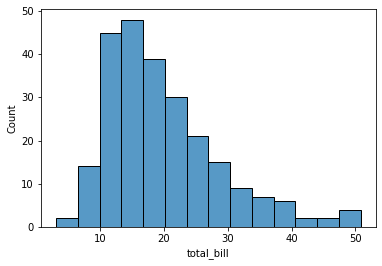

In [19]:
data = tips["total_bill"] # Данные

sns.histplot(data) # График 

# Больше всего чеков на сумму от 10 до 20 долларов.
# После достижения экстремума (15 долларов), с увеличением суммы чека снижается количество этих чеков.

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

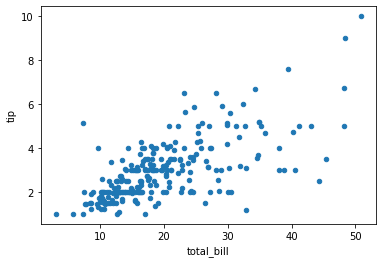

In [35]:
data_scatter = tips[["total_bill","tip"]] # Данные

data_scatter.plot.scatter(x="total_bill",y="tip") # График

# Из графика видно, что между параметрами 'total_bill' и 'tip', в общем случае, наблюдается линейная зависимость - чем больше сумма чека, тем больше чаевые. 
# Интересная тенденция - при сумме чека больше 20 долларов, клиенты, зачастую, не готовы увеличить сумму чаевых. 
# Из графика видно, что при сумме чека больше 20 долларов, сумма чаевых, чаще всего, не превышает 5 долларов. 

### Постройте pairplot

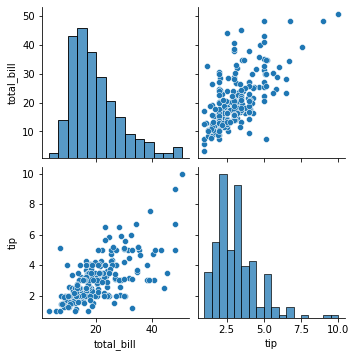

In [23]:
sns.pairplot(data_scatter)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

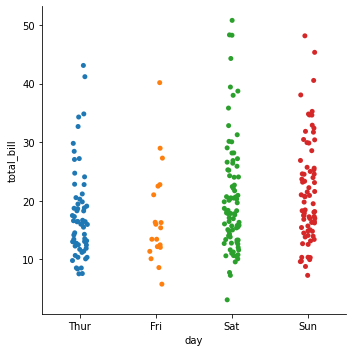

In [24]:
sns.catplot(x="day",y="total_bill",data=tips)
# Из графика видно, что посетители наиболее активны в субботу и воскресенье. В эти дни также самая большая сумма чека, 
# потраченная за услугу.

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<AxesSubplot:ylabel='Frequency'>

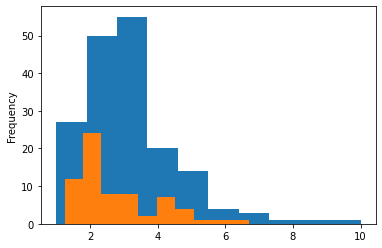

In [7]:
data_dinner = tips.tip[tips.time == "Dinner"]
data_lunch = tips.tip[tips.time == "Lunch"] 

data_dinner.plot(kind="hist")

data_lunch.plot(kind="hist")

# Из графика видно, что чаевые оставляют чаще за ужином. Чаевые за ужин в среднем в 2-3 раза больше чаевых за ланч.

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

Male
Female


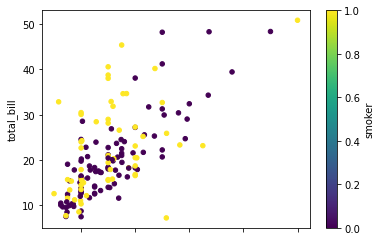

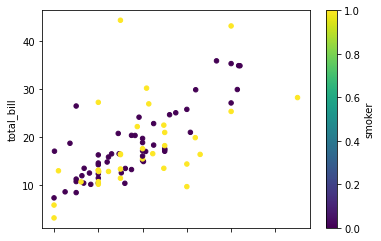

In [8]:
tips["smoker"] = np.where(tips["smoker"] == "Yes", 1 ,0) 

data_scatter= tips.groupby("sex")

for sex,num in data_scatter:
    print(sex)
    num.plot.scatter(x="tip",y="total_bill",c="smoker",cmap="viridis")
data_scatter

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [ ]:
# Из графика выше видно, что общий счёт не зависит от того курящий человек или нет.
# Следует обратить внимание на то , что количество курящих и не курящих у мужчин примерно одинаковое, а вот женщины чаще не курят.
# Курение не влияет на показатели общей суммы чека и чаевых как у мужчин, так и у женщин.
# На графике также видно, что у мужчин общий счёт часто не превышает медианы, а у женщин распределение по признаку "total_bill" равномерное.
# Можно сделать вывод, что мужчины больше тратят по основному чеку, но экономят на чаевых, а женщины, наоборот, оставляют чаевые пропорционально сумме общего чека.